In [151]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using DifferentialEquations, DynamicalSystems, StaticArrays, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [152]:
function two_coupled_fhn(u, p ,t)

    I(ϕ, g, σ, α, k) = (g / ( 1 + exp( k * ( cosd( σ / 2 ) - cosd( ϕ - α - σ / 2 ) ))))
    ρ(z, k1, k2) = k1 + k2 * z ^ 2

    x1, y1, x2, y2, z = u
    ϵ, a, α, g, σ, k, k1, k2 = p

    ϕ2 = rad2deg(atan(y2, x2))
    dx1dt = ( x1 - x1 ^ 3 / 3 - y1 + I(ϕ2, g, σ, α, k) + ρ(z, k1, k2) * ( x2 -x1 ) ) / ϵ
    dy1dt = x1 - a

    ϕ1= rad2deg(atan(y1, x1))
    dx2dt = ( x2 - x2 ^ 3 / 3 - y2 + I(ϕ1, g, σ, α, k) + ρ(z, k1, k2) * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    
    dzdt = x1 - x2

    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function two_coupled_fhn_get_params()
    ϵ = 0.01; a = -1.01; α = 160; g = 0.1; σ = 50.0; k = 50.0; k1 = 0.0; k2 = 0.0
    params = [ϵ, a, α, g, σ, k, k1, k2]
    return params
end

two_coupled_fhn_get_params (generic function with 1 method)

In [153]:
params = two_coupled_fhn_get_params();
params[7] = 0.00
params[8] = 0.0
u0 = SVector(-1.0690237112785876, -0.5773325275931365, -1.1977568518748323, -0.5654141361024896, 1.60676442231909478);
u02 = SVector(-1.1977568518748323, -0.5654141361024896, -1.0690237112785876, -0.5773325275931365, 2.50676442231909478);
u03 = SVector(-1.1977568518748323, -0.5654141361024896, -1.0690237112785876, -0.5773325275931365, 2.00676442231909478);

t_integrate = 1500.0;
tspan = (0.0, t_integrate);
integ_set = (alg = RK4(), adaptive = false, dt = 0.001);

In [154]:
prob = ODEProblem(two_coupled_fhn, u0, tspan, params)
sol = solve(prob, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

In [155]:
prob2 = ODEProblem(two_coupled_fhn, u02, tspan, params)
sol2 = solve(prob2, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

In [156]:
prob3 = ODEProblem(two_coupled_fhn, u03, tspan, params)
sol3 = solve(prob3, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

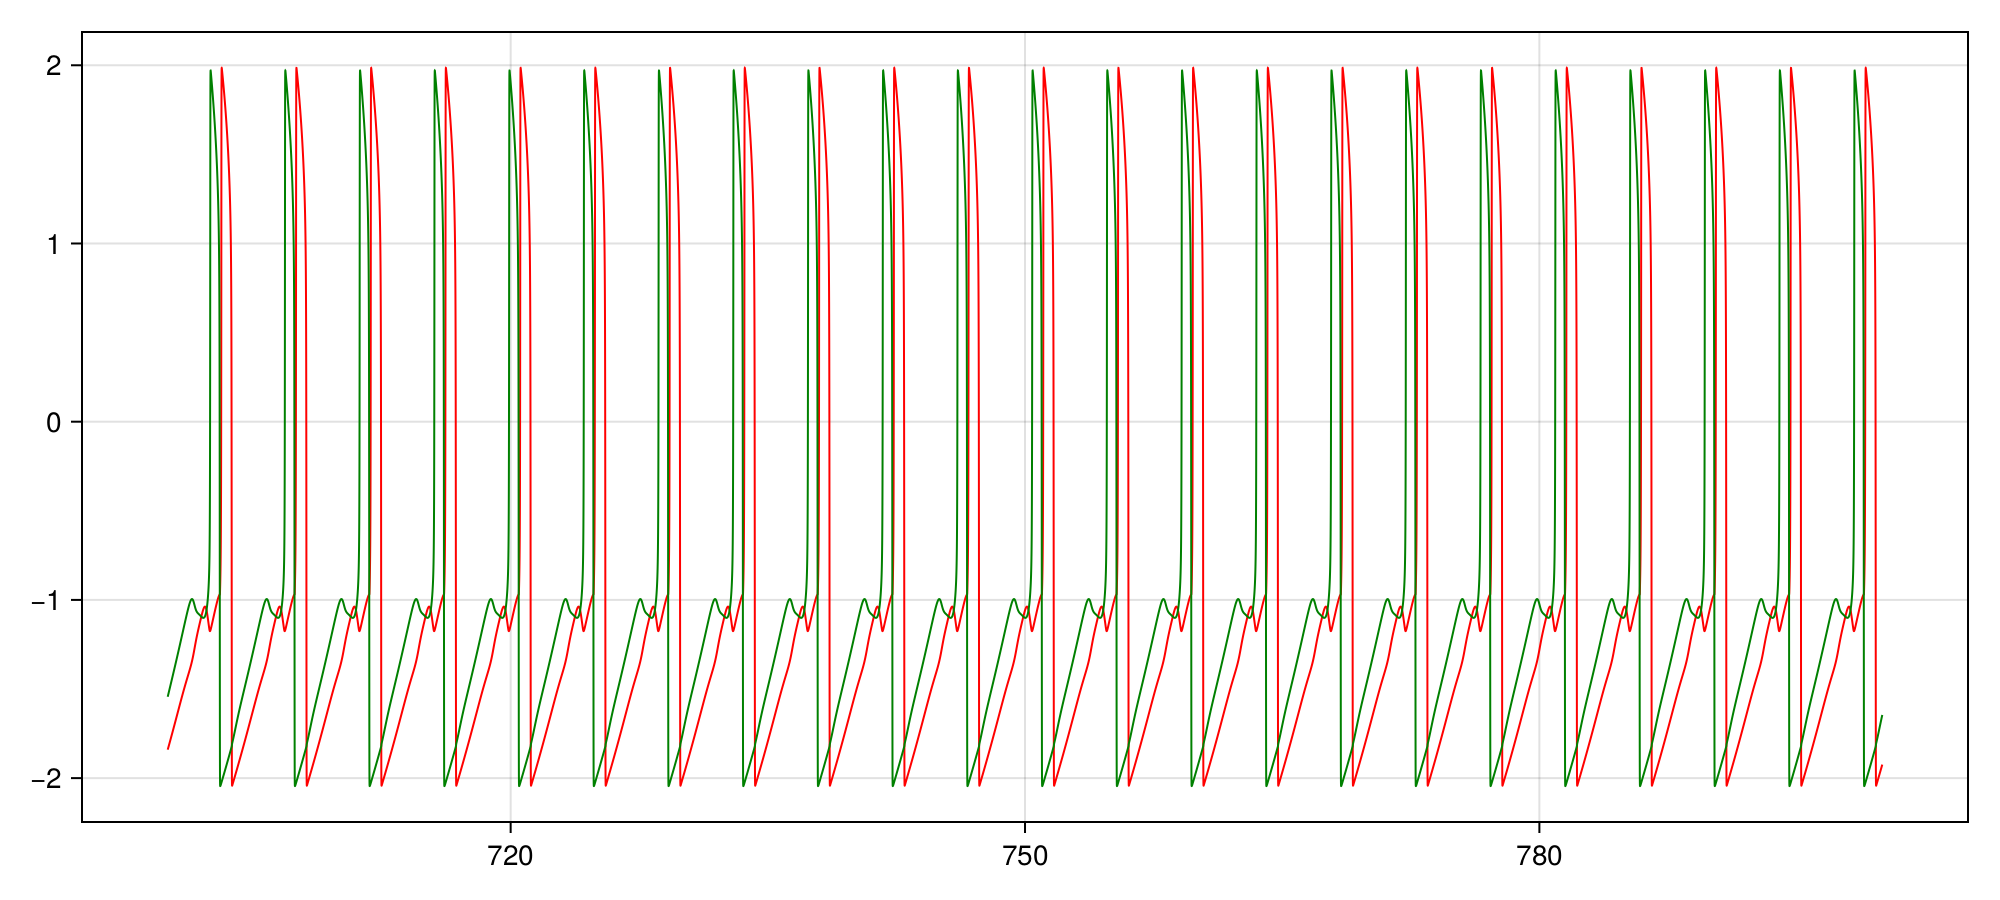

CairoMakie.Screen{IMAGE}


In [166]:
tstart = 700000; tend = 800000
f = Figure(size = (1000, 450))
ax = Axis(f[1, 1])
lines!(sol3.t[tstart:tend], sol3[1, tstart:tend], color = :red, linewidth = 1.0)
lines!(sol3.t[tstart:tend], sol3[3, tstart:tend], color = :green, linewidth = 1.0)
display(f)

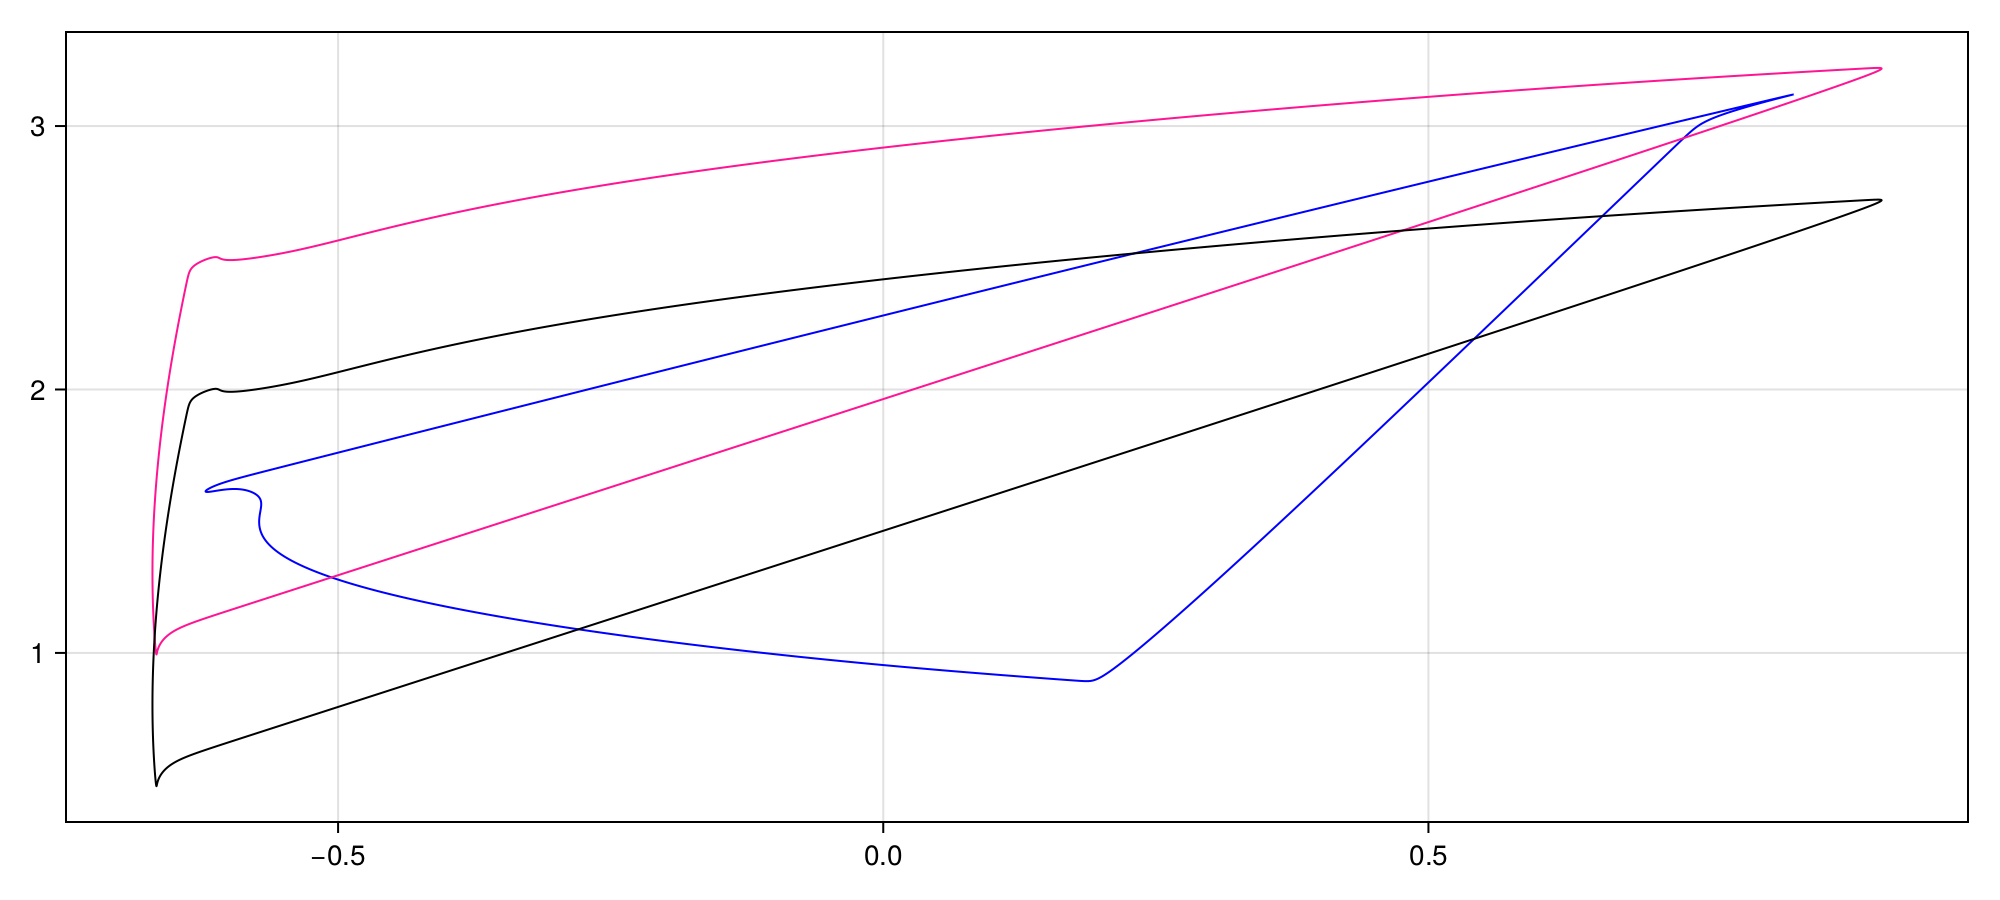

CairoMakie.Screen{IMAGE}


In [158]:
tstart = 700000; tend = 1000000
f = Figure(size = (1000, 450))
ax = Axis(f[1, 1])
lines!(sol[2, tstart:tend], sol[5, tstart:tend], color = :blue, linewidth = 1.0)

lines!(sol2[2, tstart:tend], sol2[5, tstart:tend], color = :deeppink, linewidth = 1.0)

lines!(sol3[2, tstart:tend], sol3[5, tstart:tend], color = :black, linewidth = 1.0)

display(f)

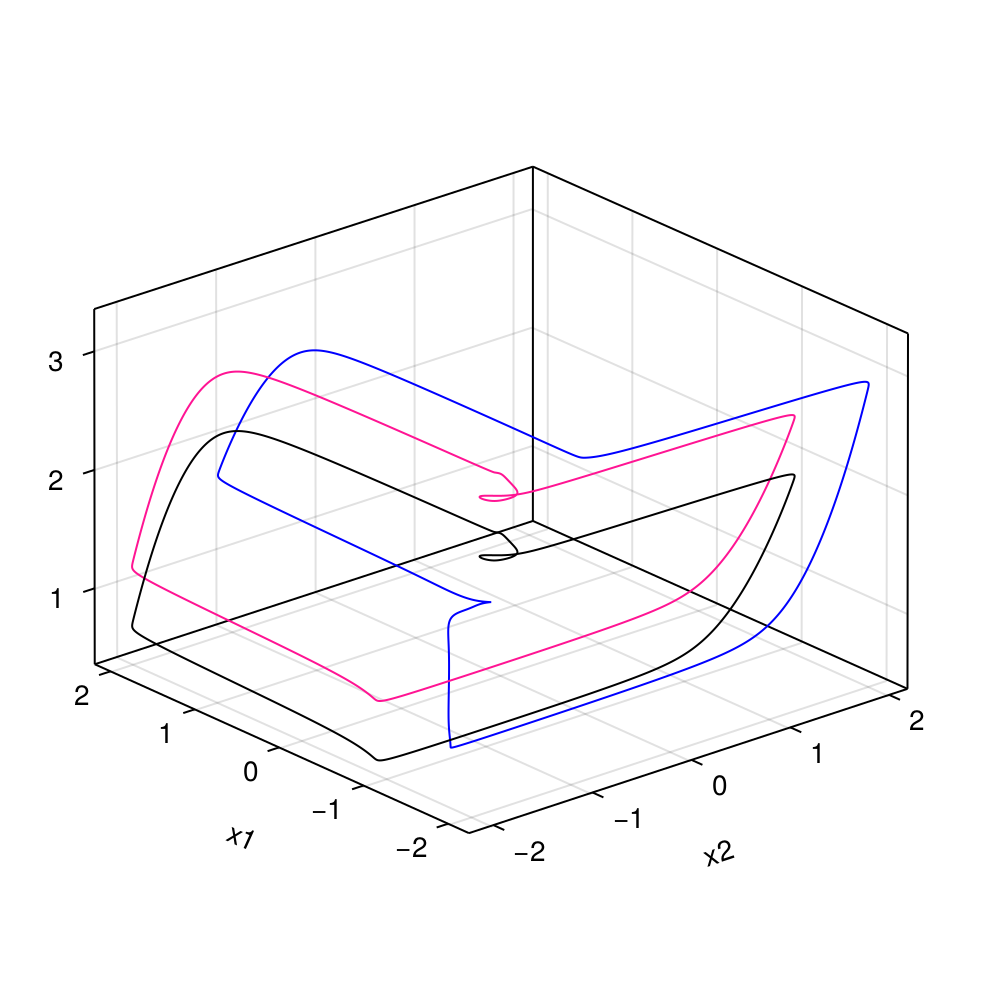

CairoMakie.Screen{IMAGE}


In [159]:
tstart = 450000; tend = 700000
f = Figure(size = (500, 500))
ax = Axis3(f[1, 1], xlabel = "x2", ylabel = "x1", zlabel = "z")

lines!(sol[3, tstart:tend], sol[1, tstart:tend], sol[5, tstart:tend], color = :blue, linewidth = 1.0)
lines!(sol2[3, tstart:tend], sol2[1, tstart:tend], sol2[5, tstart:tend], color = :deeppink, linewidth = 1.0)
lines!(sol3[3, tstart:tend], sol3[1, tstart:tend], sol3[5, tstart:tend], color = :black, linewidth = 1.0)


display(f)

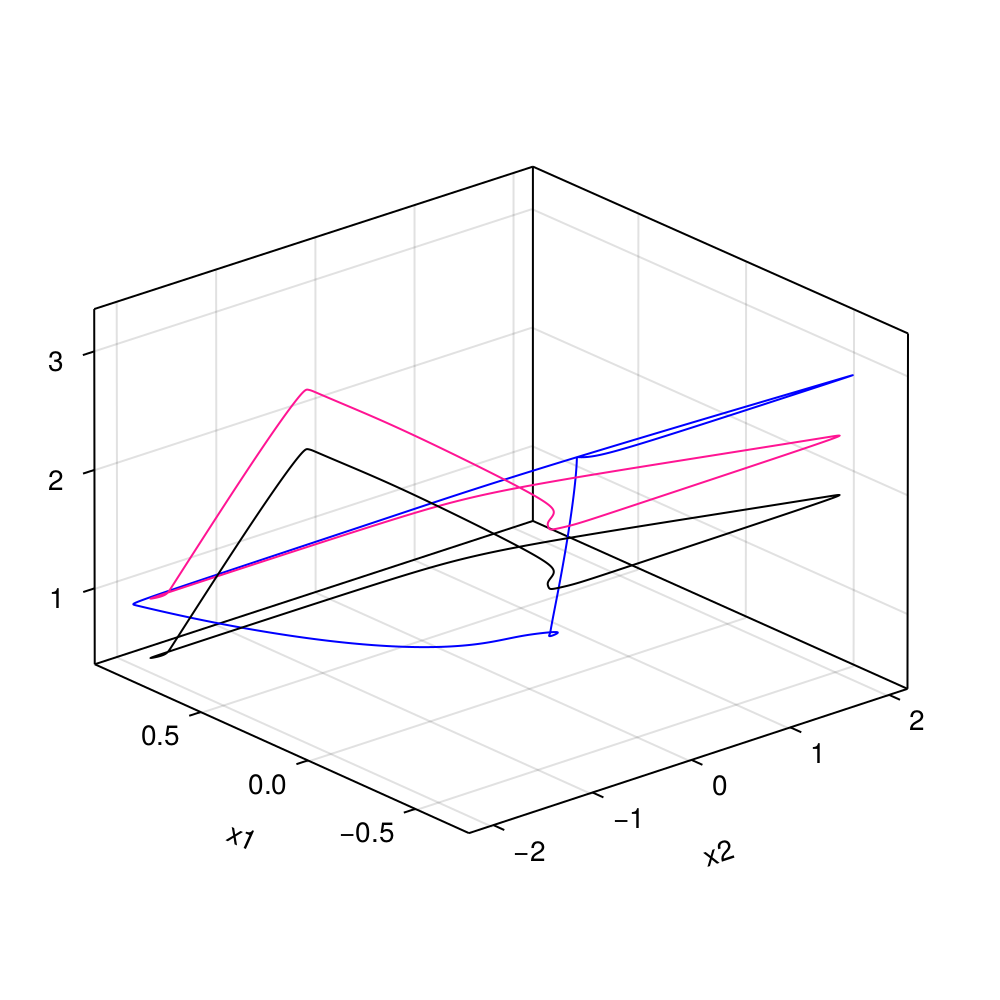

CairoMakie.Screen{IMAGE}


In [160]:
tstart = 450000; tend = 700000
f = Figure(size = (500, 500))
ax = Axis3(f[1, 1], xlabel = "x2", ylabel = "x1", zlabel = "z")

lines!(sol[3, tstart:tend], sol[4, tstart:tend], sol[5, tstart:tend], color = :blue, linewidth = 1.0)
lines!(sol2[3, tstart:tend], sol2[4, tstart:tend], sol2[5, tstart:tend], color = :deeppink, linewidth = 1.0)
lines!(sol3[3, tstart:tend], sol3[4, tstart:tend], sol3[5, tstart:tend], color = :black, linewidth = 1.0)


display(f)

In [161]:
#=
ϵ = 0.01; a = -1.01; α = 160; g = 0.1; σ = 50.0; k = 50.0; k1 = 0.0; k2 = 0.0
[-1.0690237112785876, -0.5773325275931365, -1.1977568518748323, -0.5654141361024896, 1.6067644223190947]
------------------------------------------

params = [0.01, -1.01, 160.0, 0.1, 50.0, 50.0, 0.09, 0.0]
[-1.0644089047623642, -0.6038182815265748, -0.9741882488376581, -0.6411960684480774, 1.6560606007311998]
------------------------------------------

params = [0.01, -1.01, 160.0, 0.1, 50.0, 50.0, 0.09, 0.002]
[-1.0095426498917903, -0.6366092428501819, -1.0104600932840184, -0.6368958801138922, 1.618969451073162]
------------------------------------------

params = 0.01, -1.01, 160.0, 0.1, 50.0, 50.0, 0.09, 0.0025
-1.0092493342265774, -0.6369086486640424, -1.010765472352876, -0.6365947579973191, 1.6183689231427258
=#

In [162]:
#=ds = CoupledODEs(two_coupled_fhn, u0, params, diffeq = integ_set)
pmap = PoincareMap(ds, (4, 0.0))

tr, trange = trajectory(pmap, 15000)

tstart = 1; tend = 15000=#

In [163]:
#=f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xticks = [1.65, 1.7, 1.75, 1.8], yticks = [1.73, 1.74, 1.75, 1.76])
scatter!(tr[tstart:tend, 1], tr[tstart:tend, 3], color = :red, markersize = 1.0)
xlims!(1.65, 1.85)
ylims!(1.73, 1.77)
display(f)=#